# PROJECT ON INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS:

## Business Case: INX Future Inc Employee Performance rating based on the given features:

#### MODEL CREATION & EVALUATION SUMMARY

- Loading pre-process data
- Defining dependant & independant features
- Split training and testing data
- Balancing the training data
- Model creation, prediction & evaluation
- Model saving

# Importing neccessary libraries-

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score


# Installation

In [2]:
!pip install imblearn

# Loading the pre-processed data-

In [3]:
data = pd.read_csv('square1.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany,PerformanceRating
0,-0.541458,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.645573,-0.889111,1.185833,-0.622235,-1.064491,0.749766,1.100251,-0.417335,-1.057559,0.108373,0.931441,1
1,1.109888,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.645573,-0.889111,1.185833,-0.622235,0.365956,0.749766,0.817773,-0.417335,0.151501,1.375596,0.385060,1
2,0.339260,0.809427,-0.943112,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.549010,1.594054,0.255768,-0.622235,0.365956,2.410786,2.230163,-0.417335,0.151501,1.375596,2.074247,1
3,0.449349,0.809427,-1.706766,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.645573,-0.061389,-0.674297,-0.622235,-1.064491,0.472929,0.535296,-0.417335,0.151501,1.688755,-0.048302,1
4,2.541054,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.645573,-0.337297,1.185833,-1.414051,0.365956,-0.634417,-0.594616,-0.417335,0.652311,0.108373,-0.917658,1


# Defining the Independent & Dependent features-

In [4]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [5]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,squ_YearsSinceLastPromotion,squ_TotalWorkExperienceInYears,squ_ExperienceYearsAtThisCompany
0,-0.541458,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.645573,-0.889111,1.185833,-0.622235,-1.064491,0.749766,1.100251,-0.417335,-1.057559,0.108373,0.931441
1,1.109888,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.645573,-0.889111,1.185833,-0.622235,0.365956,0.749766,0.817773,-0.417335,0.151501,1.375596,0.385060
2,0.339260,0.809427,-0.943112,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.549010,1.594054,0.255768,-0.622235,0.365956,2.410786,2.230163,-0.417335,0.151501,1.375596,2.074247
3,0.449349,0.809427,-1.706766,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.645573,-0.061389,-0.674297,-0.622235,-1.064491,0.472929,0.535296,-0.417335,0.151501,1.688755,-0.048302
4,2.541054,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.645573,-0.337297,1.185833,-1.414051,0.365956,-0.634417,-0.594616,-0.417335,0.652311,0.108373,-0.917658


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PerformanceRating, dtype: int64

# Spliting the training and testing data

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42,test_size=0.25)

# Balancing the training data-

# SMOTE- 
- SMOTE stands for Synthetic Minority Oversampling Technique.
- It is a statistical technique for increasing the number of cases in the dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.
- SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data.
- SMOTE first starts by choosing random data from the minority class, then k-nearest neighbors from the data are set.
- It is done when the dataset is imbalance in case of Classification task.

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

- **Checking distribution before applying smote** 

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='Outcome'>

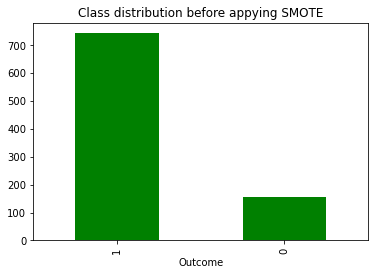

In [9]:
pd.Series(y_train).value_counts().plot(kind='bar',color='green',title='Class distribution before appying SMOTE', xlabel='Outcome')


In [10]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

- **Checking distribution after applying smote**

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Outcome'>

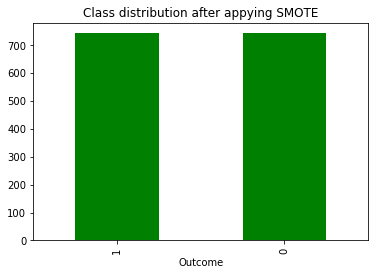

In [11]:
pd.Series(y_smote).value_counts().plot(kind='bar',color='green',title='Class distribution after appying SMOTE', xlabel='Outcome')


# Model Creation(TESTING DATA):-

**AIM**
- To create a generalised model having low bias and low variance.

**ALGORITHMS USED**
- Logistic Regression
- Support Vector Machine(Classifier)
- Support Vector Machine(Classifier)-Hyperparameter tuning.
- K-Nearest Neighbour(Classifier)
- K-Nearest Neighbour(Bagging)-Ensemble technique.
- Decision Tree(Classifier)
- Decision Tree(Classifier)-Hyperparameter tuning.
- Random Forest.
- Random Forest-Hyperparameter tuning
- Gradient Bossting- Boosting Technique.
- Artificial Neural Network.

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [13]:
clf.fit(X_smote,y_smote) 

LogisticRegression()

**Prediction on test data**

In [14]:
log_test_predict = clf.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [15]:
print('The f1 score for testing data is: ',f1_score(y_test,log_test_predict)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,log_test_predict)*100)
print('The precision score for testing data is: ',precision_score(y_test,log_test_predict)*100)
print('The recall score for testing data is: ',recall_score(y_test,log_test_predict)*100)
print("Logistic Regression(testing score) : \n",classification_report(y_test,log_test_predict))

The f1 score for testing data is:  91.1290322580645
The accuracy score for testing data is:  85.33333333333334
The precision score for testing data is:  96.99570815450643
The recall score for testing data is:  85.93155893536122
Logistic Regression(testing score) : 
               precision    recall  f1-score   support

           0       0.45      0.81      0.58        37
           1       0.97      0.86      0.91       263

    accuracy                           0.85       300
   macro avg       0.71      0.84      0.74       300
weighted avg       0.91      0.85      0.87       300



In [16]:
x=PrettyTable()

In [17]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall",]
x.add_row(["Logistic Regression", "91.12","85.33","96.99","85.93"])

In [18]:
print(x)

+---------------------+----------+----------+-----------+--------+
|     Model(Test)     | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |  91.12   |  85.33   |   96.99   | 85.93  |
+---------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score has low bias as seen from the above table.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# Support Vector Machine - Classifier

In [19]:
from sklearn.svm import SVC
clf1 = SVC()

In [20]:
clf1.fit(X_smote, y_smote) # Training the model

SVC()

**Prediction on test data**

In [21]:
svm_pred_test1=clf1.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [22]:
print('The f1 score for testing data is: ',f1_score(y_test,svm_pred_test1)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,svm_pred_test1)*100)
print('The precision score for testing data is: ',precision_score(y_test,svm_pred_test1)*100)
print('The recall score for testing data is: ',recall_score(y_test,svm_pred_test1)*100)
print("Support Vector Machine(testing score) : \n",classification_report(y_test,svm_pred_test1))

The f1 score for testing data is:  95.81749049429658
The accuracy score for testing data is:  92.66666666666666
The precision score for testing data is:  95.81749049429658
The recall score for testing data is:  95.81749049429658
Support Vector Machine(testing score) : 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        37
           1       0.96      0.96      0.96       263

    accuracy                           0.93       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.93      0.93      0.93       300



In [23]:
x=PrettyTable()

In [24]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Support Vector Machine(Classifier)", "95.81","92.0","95.81","95.81"])

In [25]:
print(x)

+------------------------------------+----------+----------+-----------+--------+
|            Model(Test)             | f1_score | accuracy | precision | recall |
+------------------------------------+----------+----------+-----------+--------+
| Support Vector Machine(Classifier) |  95.81   |   92.0   |   95.81   | 95.81  |
+------------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**
- The testing score has low bias as seen from the above table.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- But still hyperparameter tuning was done to check if the model's testing score could be better.

# Hyperparameter tuning- Support Vector Machine( Classifier)

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf1,X_smote,y_smote,cv=3,scoring='f1') ## instead of svclassifier we can also give models like linear regression an dlogistic regression
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())


[0.93762575 0.95137421 0.95798319]
Cross validation Score: 0.9489943849975448
Std : 0.0084795437519054


In [27]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.691 total time=   0.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.2s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.2s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.665 total time=   0.2s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.665 total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.799 total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.885 total time=   0.2s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.914 total time=   0.2s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.921 total time=   0.2s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.912 total time=   0.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.897 total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.917 total time=   0.2s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.903 total time=   0.2s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.894 total time=   0.2s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.886 total time=   0.2s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.964 total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.976 total time=   0.2s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.997 total time=   0.2s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.993 total time=   0.2s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.990 total time=   0.2s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.959 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.940 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.965 total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [28]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1}
SVC(C=10, gamma=0.1, random_state=42)


In [29]:
clf2=SVC(C=10, gamma=0.1, random_state=42)

In [30]:
clf2.fit(X_smote, y_smote)

SVC(C=10, gamma=0.1, random_state=42)

**Prediction on test data**

In [31]:
pred1=clf2.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [32]:
print('The f1 score for testing data is: ',f1_score(y_test,pred1)*100)
print('The accuracy score for testing data is:',accuracy_score(y_test,pred1)*100)
print('The precision score for testing data is:',precision_score(y_test,pred1)*100)
print('The recall score for testing data is:',recall_score(y_test,pred1)*100)
print("Support Vector Machine(testing score)-TUNED : \n",classification_report(y_test,pred1))

The f1 score for testing data is:  94.22382671480143
The accuracy score for testing data is: 89.33333333333333
The precision score for testing data is: 89.69072164948454
The recall score for testing data is: 99.23954372623575
Support Vector Machine(testing score)-TUNED : 
               precision    recall  f1-score   support

           0       0.78      0.19      0.30        37
           1       0.90      0.99      0.94       263

    accuracy                           0.89       300
   macro avg       0.84      0.59      0.62       300
weighted avg       0.88      0.89      0.86       300



In [33]:
x=PrettyTable()

In [34]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Support Vector Machine(Classifier)-TUNED", "94.22","89.33","89.69","99.23"])

In [35]:
print(x)

+------------------------------------------+----------+----------+-----------+--------+
|               Model(Test)                | f1_score | accuracy | precision | recall |
+------------------------------------------+----------+----------+-----------+--------+
| Support Vector Machine(Classifier)-TUNED |  94.22   |  89.33   |   89.69   | 99.23  |
+------------------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- After performimg hyperparameter tuning, the model's testing score dropped so we will not consider the tuned scores.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# K- Nearest Neighbour(Classifier)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

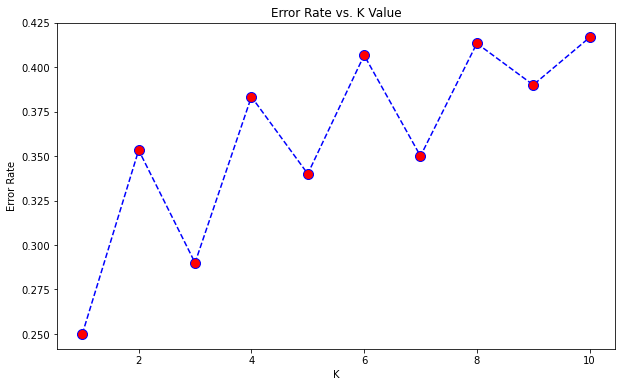

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_smote, y_smote) # Training the model

KNeighborsClassifier(n_neighbors=9)

**Prediction on test data**

In [40]:
X_pred_test=knn.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [41]:
print('The f1 score for testing data is: ',f1_score(y_test,X_pred_test)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,X_pred_test)*100)
print('The precision score for testing data is: ',precision_score(y_test,X_pred_test)*100)
print('The recall score for testing data is: ',recall_score(y_test,X_pred_test)*100)
print("K-Nearest Neighbour(testing score) : \n",classification_report(y_test,X_pred_test))

The f1 score for testing data is:  71.67070217917676
The accuracy score for testing data is:  61.0
The precision score for testing data is:  98.66666666666667
The recall score for testing data is:  56.27376425855514
K-Nearest Neighbour(testing score) : 
               precision    recall  f1-score   support

           0       0.23      0.95      0.37        37
           1       0.99      0.56      0.72       263

    accuracy                           0.61       300
   macro avg       0.61      0.75      0.55       300
weighted avg       0.89      0.61      0.67       300



In [109]:
x=PrettyTable()

In [110]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["K Nearest Neighbor", "71.6","61.0","98.66","56.27"])

In [111]:
print(x)

+--------------------+----------+----------+-----------+--------+
|    Model(Test)     | f1_score | accuracy | precision | recall |
+--------------------+----------+----------+-----------+--------+
| K Nearest Neighbor |   71.6   |   61.0   |   98.66   | 56.27  |
+--------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score has high bias as seen in the table above so the testing scores can't be considered.
- For better performance of the model bagging technique is used.

## K-Nearest Neighbour( Bagging) 

In [50]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=knn,n_estimators=10,n_jobs=-1,random_state=42)#n_estimator is number of times model repeated 

model_bagg.fit(X_smote,y_smote)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9), n_jobs=-1,
                  random_state=42)

**Prediction on test data**

In [51]:
y_hat_bagg=model_bagg.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [52]:
print('The f1 score for testing data is: ',f1_score(y_test,y_hat_bagg)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,y_hat_bagg)*100)
print('The precision score for testing data is: ',precision_score(y_test,y_hat_bagg)*100)
print('The recall score for testing data is: ',recall_score(y_test,y_hat_bagg)*100)
print("K-Nearest Neighbour(testing score)-BAGGING : \n",classification_report(y_test,y_hat_bagg))

The f1 score for testing data is:  73.07692307692307
The accuracy score for testing data is:  62.66666666666667
The precision score for testing data is:  99.34640522875817
The recall score for testing data is:  57.79467680608364
K-Nearest Neighbour(testing score)-BAGGING : 
               precision    recall  f1-score   support

           0       0.24      0.97      0.39        37
           1       0.99      0.58      0.73       263

    accuracy                           0.63       300
   macro avg       0.62      0.78      0.56       300
weighted avg       0.90      0.63      0.69       300



In [53]:
x=PrettyTable()

In [54]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["K-Nearest Neighbour(Bagging)", "73.07",'62.66','99.34','57.79'])

In [55]:
print(x)

+------------------------------+----------+----------+-----------+--------+
|         Model(Test)          | f1_score | accuracy | precision | recall |
+------------------------------+----------+----------+-----------+--------+
| K-Nearest Neighbour(Bagging) |  73.07   |  62.66   |   99.34   | 57.79  |
+------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score have changed to some extend but the scores still have high bias, so we can't consider this model to be a generalised model.
- But for better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# Decision Tree:-

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=42)

In [57]:
dtr.fit(X_smote,y_smote)

DecisionTreeClassifier(random_state=42)

**Prediction on test data**

In [58]:
X_pred_test13 = dtr.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [59]:
print('The f1 score for testing data is: ',f1_score(y_test,X_pred_test13)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,X_pred_test13)*100)
print('The precision score for testing data is: ',precision_score(y_test,X_pred_test13)*100)
print('The recall score for testing data is: ',recall_score(y_test,X_pred_test13)*100)
print("Decision Tree(testing score): \n",classification_report(y_test,X_pred_test13))

The f1 score for testing data is:  97.50479846449136
The accuracy score for testing data is:  95.66666666666667
The precision score for testing data is:  98.44961240310077
The recall score for testing data is:  96.57794676806084
Decision Tree(testing score): 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        37
           1       0.98      0.97      0.98       263

    accuracy                           0.96       300
   macro avg       0.89      0.93      0.91       300
weighted avg       0.96      0.96      0.96       300



In [60]:
x=PrettyTable()

In [61]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row([" Decision Tree", "97.50",'95.66','98.44','96.57'])

In [62]:
print(x)

+----------------+----------+----------+-----------+--------+
|  Model(Test)   | f1_score | accuracy | precision | recall |
+----------------+----------+----------+-----------+--------+
|  Decision Tree |  97.50   |  95.66   |   98.44   | 96.57  |
+----------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score has low bias as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- For more better performance, hyperparameter tuning was performed.

# Decision Tree(Hyperparameter tuning):-

In [63]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":(list(range(2, 20))),    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

In [64]:
tree_clf = DecisionTreeClassifier(random_state=1000)#object creation for decision tree with random state 1000

In [65]:
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

In [66]:
tree_cv.fit(X_smote,y_smote)#training data on gridsearch cv

Fitting 3 folds for each of 25992 candidates, totalling 77976 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1000),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [67]:
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'})


In [68]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=6,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [69]:
dt1.fit(X_smote,y_smote)#training model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6)

**Prediction on test data**

In [70]:
X_pred_testdt = dt1.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [71]:
print('The f1 score for testing data is: ',f1_score(y_test,X_pred_testdt)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,X_pred_testdt)*100)
print('The precision score for testing data is: ',precision_score(y_test,X_pred_testdt)*100)
print('The recall score for testing data is: ',recall_score(y_test,X_pred_testdt)*100)
print("Decision Tree(testing score)-TUNED: \n",classification_report(y_test,X_pred_testdt))

The f1 score for testing data is:  97.88053949903662
The accuracy score for testing data is:  96.33333333333334
The precision score for testing data is:  99.21875
The recall score for testing data is:  96.57794676806084
Decision Tree(testing score)-TUNED: 
               precision    recall  f1-score   support

           0       0.80      0.95      0.86        37
           1       0.99      0.97      0.98       263

    accuracy                           0.96       300
   macro avg       0.89      0.96      0.92       300
weighted avg       0.97      0.96      0.96       300



In [72]:
x=PrettyTable()

In [73]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row([" Decision Tree(tuned)", "97.88",'96.33','99.21','96.57'])

In [74]:
print(x)

+-----------------------+----------+----------+-----------+--------+
|      Model(Test)      | f1_score | accuracy | precision | recall |
+-----------------------+----------+----------+-----------+--------+
|  Decision Tree(tuned) |  97.88   |  96.33   |   99.21   | 96.57  |
+-----------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score has low bias as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- The tuned model doesn't have any significant difference with the untuned model.

# Random Forest:-

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

In [76]:
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier()

**Prediction on test data**

In [77]:
X_pred_test15 = rf_clf.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [78]:
print('The f1 score for testing data is: ',f1_score(y_test,X_pred_test15)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,X_pred_test15)*100)
print('The precision score for testing data is: ',precision_score(y_test,X_pred_test15)*100)
print('The recall score for testing data is: ',recall_score(y_test,X_pred_test15)*100)
print("Random Forest(testing score): \n",classification_report(y_test,X_pred_test15))

The f1 score for testing data is:  98.28571428571429
The accuracy score for testing data is:  97.0
The precision score for testing data is:  98.47328244274809
The recall score for testing data is:  98.09885931558935
Random Forest(testing score): 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.98      0.98      0.98       263

    accuracy                           0.97       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.97      0.97      0.97       300



In [79]:
x=PrettyTable()

In [80]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Random Forest", "98.28",'97.0','98.47','98.09'])

In [81]:
print(x)

+---------------+----------+----------+-----------+--------+
|  Model(Test)  | f1_score | accuracy | precision | recall |
+---------------+----------+----------+-----------+--------+
| Random Forest |  98.28   |   97.0   |   98.47   | 98.09  |
+---------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score has low bias as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.


# Hyperparameter tuning( Random Forest):-

In [82]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = (list(range(2, 20)))#minimum number of samples required to split an internal node
min_samples_leaf = (list(range(2, 20)))#minimum number of samples required to be at a leaf node.

In [83]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:
#MODEL Creation
rf_clf1 = RandomForestClassifier(random_state=42)#model

In [85]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [86]:
rf_cv.fit(X_smote, y_smote) #training the model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [87]:
rf_best_params = rf_cv.best_params_ ##it will give you best parameters 
print(f"Best paramters: {rf_best_params}") 

Best paramters: {'n_estimators': 1600, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 40}


In [88]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 1600, min_samples_split= 3, min_samples_leaf= 2, 
                                 max_features= 'log2', max_depth= 40)

In [89]:
rf_clf2.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=1600)

**Prediction on test data**

In [90]:
X_pred_test16 = rf_clf2.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [91]:
print('The f1 score for testing data is: ',f1_score(y_test,X_pred_test16)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,X_pred_test16)*100)
print('The precision score for testing data is: ',precision_score(y_test,X_pred_test16)*100)
print('The recall score for testing data is: ',recall_score(y_test,X_pred_test16)*100)
print("Random Forest(testing score)-TUNED: \n",classification_report(y_test,X_pred_test16))

The f1 score for testing data is:  97.90476190476191
The accuracy score for testing data is:  96.33333333333334
The precision score for testing data is:  98.09160305343512
The recall score for testing data is:  97.71863117870723
Random Forest(testing score)-TUNED: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.98      0.98      0.98       263

    accuracy                           0.96       300
   macro avg       0.91      0.92      0.92       300
weighted avg       0.96      0.96      0.96       300



In [92]:
x=PrettyTable()

In [93]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row([" Random Forest (Hyperparameter)", '97.90','96.33','98.09','97.71'])

In [94]:
print(x)

+---------------------------------+----------+----------+-----------+--------+
|           Model(Test)           | f1_score | accuracy | precision | recall |
+---------------------------------+----------+----------+-----------+--------+
|  Random Forest (Hyperparameter) |  97.90   |  96.33   |   98.09   | 97.71  |
+---------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score has low bias as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.
- The tuned model doesn't have any significant difference with the untuned model.

# Gradient Boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
clf34 = GradientBoostingClassifier(random_state=44)

In [96]:
clf34.fit(X_smote,y_smote)#training model with best parameter

GradientBoostingClassifier(random_state=44)

**Prediction on test data**

In [97]:
boost1 = clf34.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [98]:
print('The f1 score for testing data is: ',f1_score(y_test,boost1)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,boost1)*100)
print('The precision score for testing data is: ',precision_score(y_test,boost1)*100)
print('The recall score for testing data is: ',recall_score(y_test,boost1)*100)
print("Gradient Boosting: \n",classification_report(y_test,boost1))

The f1 score for testing data is:  98.27915869980879
The accuracy score for testing data is:  97.0
The precision score for testing data is:  98.84615384615385
The recall score for testing data is:  97.71863117870723
Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.99      0.98      0.98       263

    accuracy                           0.97       300
   macro avg       0.92      0.95      0.93       300
weighted avg       0.97      0.97      0.97       300



In [99]:
x=PrettyTable()

In [100]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Gradient Boosting", "98.27",'97.0','98.84','97.71'])

In [101]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Gradient Boosting", "98.27",'97.0','98.84','97.71'])

+-------------------+----------+----------+-----------+--------+
|    Model(Test)    | f1_score | accuracy | precision | recall |
+-------------------+----------+----------+-----------+--------+
| Gradient Boosting |  98.27   |   97.0   |   98.84   | 97.71  |
+-------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score has low bias as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# Artificial Neural Network [MLP Classifier]

In [102]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [103]:
# Fitting the training data
model.fit(X_smote,y_smote)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

**Prediction on test data**

In [104]:
mlp1= model.predict(X_test)

**MODEL EVALUATION OF TESTING DATA**

In [105]:
print('The f1 score for testing data is: ',f1_score(y_test,mlp1)*100)
print('The accuracy score for testing data is: ',accuracy_score(y_test,mlp1)*100)
print('The precision score for testing data is: ',precision_score(y_test,mlp1)*100)
print('The recall score for testing data is: ',recall_score(y_test,mlp1)*100)
print("Artificial Neural Network [MLP Classifier]: \n",classification_report(y_test,mlp1))

The f1 score for testing data is:  96.00000000000001
The accuracy score for testing data is:  93.0
The precision score for testing data is:  96.18320610687023
The recall score for testing data is:  95.81749049429658
Artificial Neural Network [MLP Classifier]: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72        37
           1       0.96      0.96      0.96       263

    accuracy                           0.93       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.93      0.93      0.93       300



In [113]:
x=PrettyTable()

In [114]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row([" Artificial Neural Network [MLP Classifier]", "96.0",'0.93.0','96.18','95.81'])

In [115]:
print(x)

+---------------------------------------------+----------+----------+-----------+--------+
|                 Model(Test)                 | f1_score | accuracy | precision | recall |
+---------------------------------------------+----------+----------+-----------+--------+
|  Artificial Neural Network [MLP Classifier] |   96.0   |  0.93.0  |   96.18   | 95.81  |
+---------------------------------------------+----------+----------+-----------+--------+


####  **OBSERVATIONS:**

- The testing score has low bias as shown in the table above.
- For better understanding both the testing and training scores should be checked before considering a model to be a generalised model.

# Conclusion:

- Eleven machine learning models i.e Logistic Regression, Support Vector Machine(Classifier),Support Vector Machine(Classifier)-Hyperparameter tuning, K-Nearest Neighbour(Classifier),K-Nearest Neighbour(Bagging)-Ensemble technique, Decision Tree(Classifier), Decision Tree(Classifier)-Hyperparameter tuning, Random Forest, Random Forest-Hyperparameter tuning, Gradient Bossting- Boosting Technique and Artificial Neural Network were examined to predict the performance rating of the employees in the company.
- Ensemble techniques such as bagging and boosting is also used.
- The training and testing data were used to train and test the data.These records were used to extract a number of characteristics.My suggested model can estimate the performance rating of the employees in the business level.
- The original dataset was a multiclass classification task but for better understanding and better model evaluation the dataset was converted into a binary classification task.
- Almost all the model performed well in the testing data with good f1-score,accuracy,precision and recall.
- For better understanding and to conclude about the data, the training score of the model is also important.
- In the summary report the detail training and testing scores are mentioned along with the best model.
